<a href="https://colab.research.google.com/github/marcelopayanog/data-science-salaries-analysis/blob/main/data_science_salaries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/data_science_salaries.csv')
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [ ]:
#Devuelve una tupla con el número filas y columnas del DF
df.shape # ejemplo (N° filas, N° columnas)

(6599, 11)

In [ ]:
# Muestra los tipos de datos de cada columna del DataFrame.
df.dtypes

,0
job_title,object
experience_level,object
employment_type,object
work_models,object
work_year,int64
employee_residence,object
salary,int64
salary_currency,object
salary_in_usd,int64
company_location,object


In [ ]:
#Devuelve un listado con los nombres de las columnas del DataFrame.
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Devuelve un resumen estadístico de las columnas numéricas.
df.describe().round(2)

,work_year,salary,salary_in_usd
count,6599.00,6599.00,6599.00
mean,2022.82,179283.26,145560.56
std,0.67,526372.24,70946.84
min,2020.00,14000.00,15000.00
25%,2023.00,96000.00,95000.00
50%,2023.00,140000.00,138666.00
75%,2023.00,187500.00,185000.00
max,2024.00,30400000.00,750000.00


In [ ]:
# Revisamos si hay valores nulos en cada columna

df.isnull().sum()

,0
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0


In [30]:
# Muestra el número de valores distintos en cada columna
df.nunique()

,0
job_title,132
experience_level,4
employment_type,4
work_models,3
work_year,5
employee_residence,87
salary_in_usd,2147
company_location,75
company_size,3


In [ ]:
# Muestra cuántas veces aparece cada categoría en esa columna
df['company_location'].value_counts()

,count
company_location,
United States,5354
United Kingdom,408
Canada,243
Germany,78
Spain,63
...,...
China,1
Chile,1
Bahamas,1


In [29]:
# Eliminar columnas innecesarias
df.drop(['salary_currency', 'salary'], axis=1, inplace=True)

In [32]:
# ¿Cuál es el salario promedio por puesto?

df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

,salary_in_usd
job_title,
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
Managing Director Data Science,280000.000000
AWS Data Architect,258000.000000
Cloud Data Architect,250000.000000
...,...
Machine Learning Specialist,55000.000000
Insight Analyst,46339.833333
Compliance Data Analyst,45000.000000


In [33]:
# ¿Qué tipo de contrato paga más?

df.groupby('employment_type')['salary_in_usd'].mean()

,salary_in_usd
employment_type,
Contract,117109.368421
Freelance,51923.166667
Full-time,146034.998932
Part-time,55291.062500


In [34]:
#  ¿Cómo cambia el salario según la experiencia?
df.groupby('experience_level')['salary_in_usd'].mean()

,salary_in_usd
experience_level,
Entry-level,84448.916814
Executive-level,189687.346457
Mid-level,119019.812537
Senior-level,162071.063581


<Axes: xlabel='work_year'>

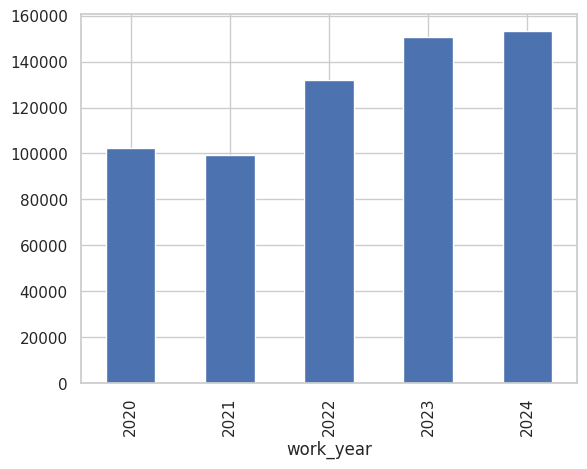

In [35]:
# ¿En qué año los sueldos fueron más altos?
df.groupby('work_year')['salary_in_usd'].mean().plot(kind='bar')

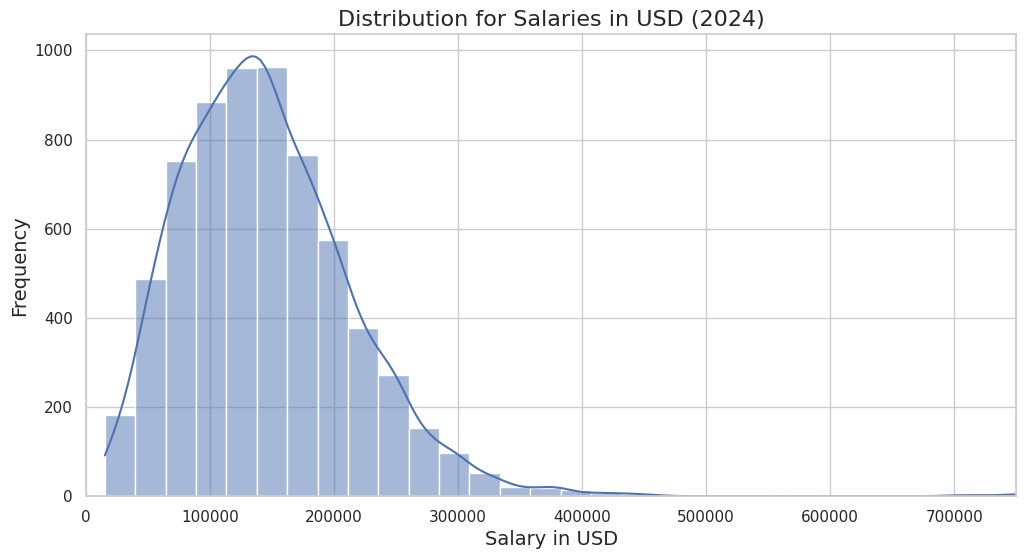

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution for Salaries in USD (2024)', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,df['salary_in_usd'].max())
plt.show()